In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

In [128]:
df_schools = pd.read_csv("Masterlist of Schools.csv", index_col="school.id")

df_location = pd.read_csv("Schools Location Data.csv", 
                          encoding = "latin-1", 
                          index_col="School ID",
                          usecols=["School ID", "Enrolment", "Latitude", "Longitude"])

df_rooms = pd.read_csv('Rooms data.csv', index_col="School ID")

df_teachers = pd.read_csv("Teachers data.csv", index_col="school.id")

df_elementary = pd.read_csv("Enrollment Master Data_2015_E.csv")[:-1].astype(int).set_index("School ID")

df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .rename(columns = {'SPED NG Male':'SPED NG Male SS', 'SPED NG Female' :'SPED NG Female SS'})
                  .set_index("School ID"))

df_mooe = (pd.read_csv('MOOE data.csv', index_col="school.id", usecols=["school.id", " school.mooe "])
             .replace(",", "", regex=True).astype(float))

In [129]:
df_schools.shape

(46603, 22)

In [199]:
df_all = pd.concat([df_schools, df_location, df_rooms, df_teachers, df_elementary, df_secondary, df_mooe], axis=1)
df_all

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS,school.mooe
100001,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,Apaleng-Libtong PS,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban,90.0,18.253666,120.606180,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84000.0
100002,Bacarra CES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,456.0,18.250964,120.608958,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268000.0
100003,Buyon ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,167.0,18.234599,120.616037,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0
100004,Ganagan ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,NaN,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,122.0,18.250014,120.587169,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116000.0
100005,Macupit ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100005.0,Macupit,1/1/1913,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,77.0,18.293994,120.641019,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326101,Upper Katungal National High School-TNHS Annex,Region XII,Soccsksargen,SULTAN KUDARAT,SULTAN KUDARAT,Tacurong City,CITY OF TACURONG,Tacurong South,1st District,Annex or Extension school(s),UKNHS-TNHS Annex,Tacurong NHS - Upper Katungal Annex,304624.0,Upper Katungal,1/1/2011,Secondary,DepED Managed,Secondary,Monograde,P 160 M or more but less than P 240 M

In [200]:
df_all.shape

(46751, 64)

In [8]:
df_all.isna().sum()

school.name                     148
school.region                   148
school.region.name              148
school.province                 148
school.cityhall                 149
school.division                 148
school.citymuni                 148
school.district                 148
school.legdistrict              148
school.type                     148
school.abbrev                 28584
school.previousname            4530
school.mother.id                155
school.address                 2130
school.established              157
school.classification           148
school.classification2          148
school.curricularclass          148
school.organization             148
school.cityincome              1124
school.cityclass              38538
school.urban                    151
Enrolment                       127
Latitude                        130
Longitude                       130
rooms.standard.academic         339
rooms.standard.unused           339
rooms.nonstandard.academic  

In [10]:
df_all[df_all.index.duplicated(keep=False)]

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male,SPED NG Female,school.mooe


In [49]:
df_all.columns

Index(['school.name', 'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'Enrolment', 'Latitude',
       'Longitude', 'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Femal

In [123]:
df_all['Total Elementary SPED Students'] = df_all['SPED NG Male'] + df_all['SPED NG Female']
df_all['Total Secondary SPED Students'] = df_all['SPED NG Male SS'] + df_all['SPED NG Female SS']
df_all['Total Rooms'] = (df_all['rooms.standard.academic'] + 
                             df_all['rooms.standard.unused'] + 
                             df_all['rooms.nonstandard.academic'] + 
                             df_all['rooms.nonstandard.unused'])
df_all['Total Teachers'] = (df_all['teachers.instructor'] + 
                             df_all['teachers.mobile'] + 
                             df_all['teachers.regular'] + df_all['teachers.sped'])
                            
# df_all['SPED Teachers'] = df_all['teachers.sped']

In [150]:
import pickle

with open('df_all.pkl', 'wb') as f:
    pickle.dump(df_all, f)

# #### Reading file

your_data_frame = pd.read_pickle("df_all.pkl")
your_data_frame

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS,school.mooe,Total Elementary SPED Students,Total Secondary SPED Students,Total Rooms,Total Teachers,Other Teachers,SPED Teachers
100001,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,Apaleng-Libtong PS,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban,90.0,18.253666,120.606180,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84000.0,0.0,NaN,2.0,2.0,2.0,0.0
100002,Bacarra CES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,456.0,18.250964,120.608958,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268000.0,0.0,NaN,12.0,17.0,17.0,0.0
100003,Buyon ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,167.0,18.234599,120.616037,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0,0.0,NaN,6.0,7.0,7.0,0.0
100004,Ganagan ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,NaN,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,122.0,18.250014,120.587169,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116000.0,0.0,NaN,6.0,7.0,7.0,0.0
100005,Macupit ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100005.0,Macupit,1/1/1913,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,77.0,18.293994,120.641019,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115000.0,0.0,NaN,6.0,7.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326101,Upper Katungal National High School-TNHS Annex,Region XII,Soccsksargen,SULTAN KUDARAT,SULTAN

In [153]:
df_eda

,school.classification,school.classification2,school.type,school.urban,Total Teachers,Total Enrollees,Total Rooms,School MOOE
100001,Elementary,DepED Managed,School with no Annexes,Partially Urban,2.0,90.0,2.0,84000.0
100002,Elementary,DepED Managed,School with no Annexes,Partially Urban,17.0,456.0,12.0,268000.0
100003,Elementary,DepED Managed,School with no Annexes,Partially Urban,7.0,167.0,6.0,135000.0
100004,Elementary,DepED Managed,School with no Annexes,Partially Urban,7.0,122.0,6.0,116000.0
100005,Elementary,DepED Managed,School with no Annexes,Partially Urban,7.0,77.0,6.0,115000.0
...,...,...,...,...,...,...,...,...
326101,Secondary,DepED Managed,Annex or Extension school(s),Partially Urban,NaN,262.0,2.0,174000.0
326102,Secondary,DepED Managed,Annex or Extension school(s),Partially Urban,NaN,191.0,2.0,144000.0
326501,Secondary,DepED Managed,School with no Annexes,Partially Urban,0.0,185.0,NaN,NaN
356059,Secondary,DepED Managed,Annex or Extension school(s),Partially Urban,NaN,136.0,3.0,177000.0


In [155]:
df_eda.shape

(46751, 8)

In [157]:
df_eda.isnull().sum()

school.classification      148
school.classification2     148
school.type                148
school.urban               151
Total Teachers            1711
Total Enrollees            127
Total Rooms                343
School MOOE               2723
dtype: int64

In [159]:
df_eda_missing = (df_eda.isnull().sum() / len(df_eda))*100
df_eda_missing = df_eda_missing.drop(df_eda_missing[df_eda_missing == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Percentage':df_eda_missing})
missing_data

,Missing Percentage
School MOOE,5.824474
Total Teachers,3.659815
Total Rooms,0.733674
school.urban,0.322988
school.classification,0.316571
school.classification2,0.316571
school.type,0.316571
Total Enrollees,0.271652


In [161]:
df_eda_clean = df_eda.dropna()
df_eda_clean.shape

(42339, 8)

In [166]:
dropped_rows = (df_eda.shape[0] - df_eda_clean.shape[0])/df_eda.shape[0]*100
dropped_rows

9.437231289170285

In [168]:
df_eda_clean

,school.classification,school.classification2,school.type,school.urban,Total Teachers,Total Enrollees,Total Rooms,School MOOE
100001,Elementary,DepED Managed,School with no Annexes,Partially Urban,2.0,90.0,2.0,84000.0
100002,Elementary,DepED Managed,School with no Annexes,Partially Urban,17.0,456.0,12.0,268000.0
100003,Elementary,DepED Managed,School with no Annexes,Partially Urban,7.0,167.0,6.0,135000.0
100004,Elementary,DepED Managed,School with no Annexes,Partially Urban,7.0,122.0,6.0,116000.0
100005,Elementary,DepED Managed,School with no Annexes,Partially Urban,7.0,77.0,6.0,115000.0
...,...,...,...,...,...,...,...,...
325307,Secondary,DepED Managed,Mother school,Partially Urban,0.0,171.0,2.0,200000.0
325308,Secondary,DepED Managed,School with no Annexes,Partially Urban,0.0,232.0,4.0,247000.0
325502,Secondary,DepED Managed,School with no Annexes,Partially Urban,3.0,230.0,0.0,212000.0
325901,Secondary,DepED Managed,School with no Annexes,Urban,0.0,1881.0,8.0,1281000.0


## Feature Engineering

In [177]:
# Create a new variable Student-Teacher Ratio
df_eda_clean['Student Teacher Ratio'] = df_eda_clean['Total Enrollees'] / df_eda_clean['Total Teachers']
df_eda_clean = df_eda_clean[df_eda_clean['Total Teachers'] != 0] # Deleted rows with 0 values for teacher
df_eda_clean = df_eda_clean[df_eda_clean['Total Rooms'] != 0] # Deleted rows with 0 values for total rooms
df_eda_clean = df_eda_clean[df_eda_clean['School MOOE'] != 0] # Deleted rows with 0 values for School mooe
df_eda_clean

,school.classification,school.classification2,school.type,school.urban,Total Teachers,Total Enrollees,Total Rooms,School MOOE,Student Teacher Ratio
100001,Elementary,DepED Managed,School with no Annexes,Partially Urban,2.0,90.0,2.0,84000.0,45.000000
100002,Elementary,DepED Managed,School with no Annexes,Partially Urban,17.0,456.0,12.0,268000.0,26.823529
100003,Elementary,DepED Managed,School with no Annexes,Partially Urban,7.0,167.0,6.0,135000.0,23.857143
100004,Elementary,DepED Managed,School with no Annexes,Partially Urban,7.0,122.0,6.0,116000.0,17.428571
100005,Elementary,DepED Managed,School with no Annexes,Partially Urban,7.0,77.0,6.0,115000.0,11.000000
...,...,...,...,...,...,...,...,...,...
324101,Secondary,DepED Managed,Mother school,Partially Urban,1.0,192.0,2.0,169000.0,192.000000
325101,Secondary,DepED Managed,School with no Annexes,Partially Urban,10.0,407.0,3.0,409000.0,40.700000
325102,Secondary,DepED Managed,School with no Annexes,Partially Urban,8.0,302.0,5.0,331000.0,37.750000
325104,Secondary,DepED Managed,School with no Annexes,Partially Urban,11.0,503.0,9.0,460000.0,45.727273


<AxesSubplot:>

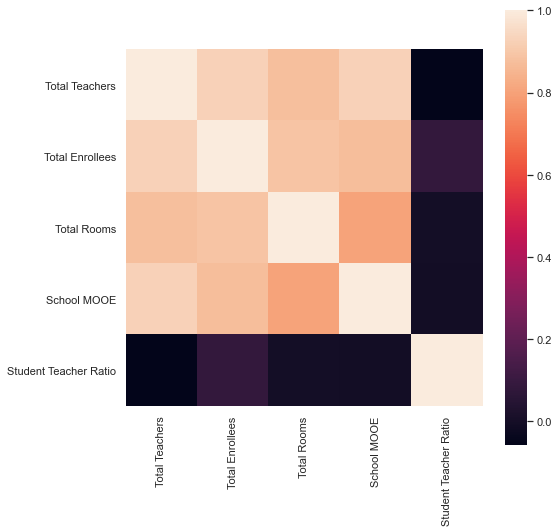

In [178]:
corrmat_eda = df_eda_clean.corr()
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corrmat_eda, square = True)

In [182]:
df_eda_missing = (df_eda_clean.isnull().sum() / len(df_eda_clean))*100
df_eda_missing = df_eda_missing.drop(df_eda_missing[df_eda_missing == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Percentage':df_eda_missing})
missing_data

,Missing Percentage


In [209]:
df_eda_clean.columns

Index(['school.classification', 'school.classification2', 'school.type',
       'school.urban', 'Total Teachers', 'Total Enrollees', 'Total Rooms',
       'School MOOE', 'Student Teacher Ratio'],
      dtype='object')

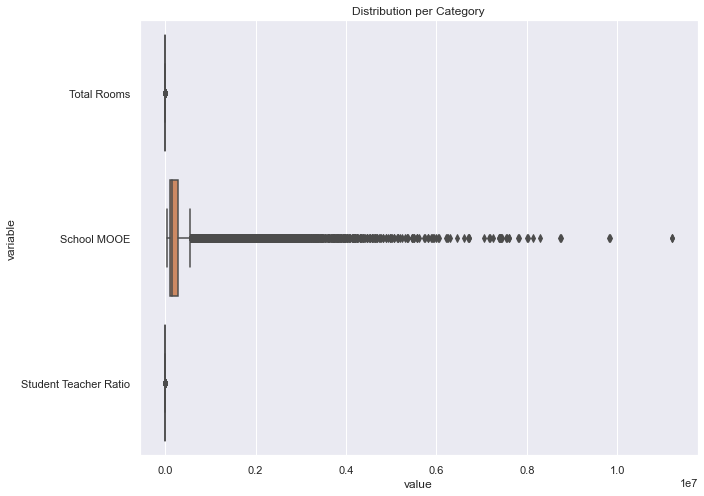

In [198]:
df_boxplot = df_eda_clean[['Total Rooms','School MOOE','Student Teacher Ratio']]
plt.figure(figsize = (10,8))
sns.boxplot(x='value',y='variable', data = pd.melt(eda))
plt.title('Distribution per Category')

# Q1 =  df_eda_clean[['Total Rooms','School MOOE','Student Teacher Ratio']].quantile(0.25)
# Q3 =  df_eda_clean[['Total Rooms','School MOOE','Student Teacher Ratio']].quantile(0.75)
# IQR = Q3 - Q1
# IQR

# df_eda_clean = df_eda_clean[~((df_eda_clean[nat] < (Q1 - 1.5 * IQR)) |(df[nat] > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.show()

In [204]:
# cat_col = ['school.classification', 'school.classification2', 'school.type',
#        'school.urban']

# for col in cat_col:
#     plt.figure()
#     sns.pairplot(df_eda_clean, size = 3.0, hue = col)
#     plt.show()

In [246]:
df_eda_numeric.describe()

,Total Rooms,School MOOE,Student Teacher Ratio,Cluster Labels
count,41714.000000,4.171400e+04,41714.000000,41714.000000
mean,9.600686,3.077132e+05,38.740905,3.457736
std,10.259961,4.946153e+05,19.634619,2.141473
min,1.000000,4.800000e+04,0.000000,0.000000
25%,4.000000,1.150000e+05,29.000000,3.000000
50%,6.000000,1.590000e+05,36.571429,3.000000
75%,11.000000,2.940000e+05,45.000000,6.000000
max,187.000000,1.121800e+07,1570.000000,7.000000


In [247]:
df_eda_numeric = df_eda_clean[['Total Rooms','School MOOE','Student Teacher Ratio']]

## Factors
<br> 1.) Rooms, MOOE, ST Ratio (by teacher / by room) (Government Allocation)
<br> 2.) Student-Teacher Ratio, NAT Scores of Elementary and Secondary (Student Performance)
<br> 3.) Elementary vs Secondary difference
<br> 4.) Cluster schools by their budget, rooms, 



### Resources Allocation by Student-Teacher Ratio

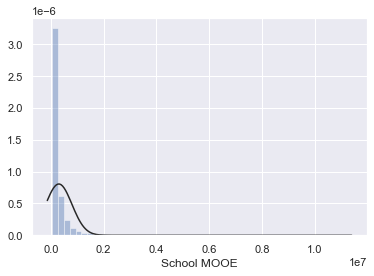

In [203]:
x = df_eda_clean['School MOOE']
ax = sns.distplot(x, fit=norm, kde=False)

In [248]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df_eda_numeric)

In [249]:
data_scaled.mean(axis=0)

array([0.04624025, 0.02325096, 0.02467574])

In [250]:
data_scaled.std(axis=0)

array([0.05516042, 0.04428016, 0.01250598])

In [251]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(data_scaled)
cluster_labels_k = model.predict(data_scaled)   

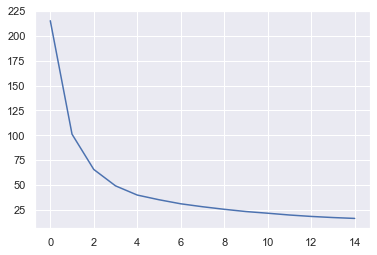

In [218]:
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = list(np.arange(1,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [255]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
cluster_labels_k = kmeans.predict(data_scaled)   

df_eda_numeric['Cluster Labels'] = cluster_labels_k
df_eda_numeric['Cluster Labels'].value_counts()

2    35935
0     5099
1      680
Name: Cluster Labels, dtype: int64

In [236]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
range_n_clusters = list(np.arange(2,9))

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data_scaled)
    
    cluster_labels_k = kmeans.predict(data_scaled)
    
    # silhouette score
    silhouette_avg = silhouette_score(data_scaled, cluster_labels_k)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7847613300697651
For n_clusters=3, the silhouette score is 0.6806190217801262
For n_clusters=4, the silhouette score is 0.545869576232867
For n_clusters=5, the silhouette score is 0.5031574728139693
For n_clusters=6, the silhouette score is 0.5003152114784282
For n_clusters=7, the silhouette score is 0.47516045845376254
For n_clusters=8, the silhouette score is 0.3553730263016054


In [277]:
df_cluster_0 = df_eda_numeric[df_eda_numeric['Cluster Labels']==0]
df_cluster_0.describe()

,Total Rooms,School MOOE,Student Teacher Ratio,Cluster Labels,Cluster_Labels_H
count,5099.000000,5.099000e+03,5099.000000,5099.0,5099.000000
mean,24.601883,8.288570e+05,39.642788,0.0,0.000392
std,8.516407,4.577471e+05,24.729136,0.0,0.028008
min,4.000000,2.450000e+05,2.000000,0.0,0.000000
25%,18.000000,4.770000e+05,31.765965,0.0,0.000000
50%,22.000000,7.120000e+05,38.409091,0.0,0.000000
75%,29.000000,1.034000e+06,45.800000,0.0,0.000000
max,57.000000,3.723000e+06,1570.000000,0.0,2.000000


In [276]:
df_cluster_1 = df_eda_numeric[df_eda_numeric['Cluster Labels']==1]
df_cluster_1.describe()

,Total Rooms,School MOOE,Student Teacher Ratio,Cluster Labels,Cluster_Labels_H
count,680.000000,6.800000e+02,680.000000,680.0,680.000000
mean,60.639706,3.003987e+06,36.685810,1.0,0.295588
std,21.245141,1.593725e+06,10.139304,0.0,0.456643
min,17.000000,9.160000e+05,2.419355,1.0,0.000000
25%,46.000000,1.914500e+06,29.291038,1.0,0.000000
50%,58.000000,2.633500e+06,36.329386,1.0,0.000000
75%,71.000000,3.628500e+06,43.458569,1.0,1.000000
max,187.000000,1.121800e+07,66.232143,1.0,1.000000


In [275]:
df_cluster_2 = df_eda_numeric[df_eda_numeric['Cluster Labels']==2]
df_cluster_2.describe()

,Total Rooms,School MOOE,Student Teacher Ratio,Cluster Labels,Cluster_Labels_H
count,35935.000000,3.593500e+04,35935.000000,35935.0,35935.0
mean,6.506275,1.827437e+05,38.651821,2.0,0.0
std,3.545977,1.205774e+05,18.937104,0.0,0.0
min,1.000000,4.800000e+04,0.000000,2.0,0.0
25%,4.000000,1.090000e+05,28.500000,2.0,0.0
50%,6.000000,1.440000e+05,36.250000,2.0,0.0
75%,8.000000,2.190000e+05,45.000000,2.0,0.0
max,18.000000,1.553000e+06,851.000000,2.0,0.0


In [270]:
df_clusters = gpd.read_file(df_eda_numeric)

TypeError: expected string or bytes-like object

## Hierarchical Clustering

In [237]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

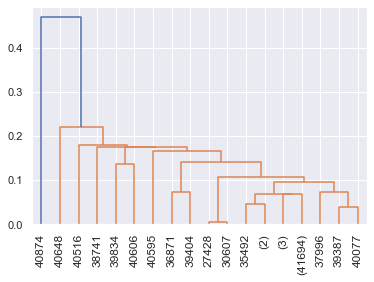

In [238]:
mergings = linkage(data_scaled, method="single", metric='euclidean')

dendrogram(mergings, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

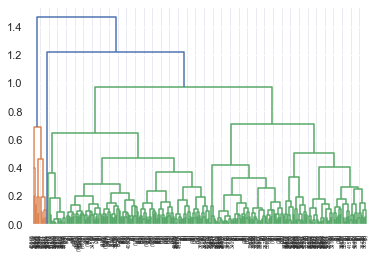

In [239]:
mergings = linkage(data_scaled, method="complete", metric='euclidean')
dendrogram(mergings, p=10, truncate_mode="level")
plt.show()

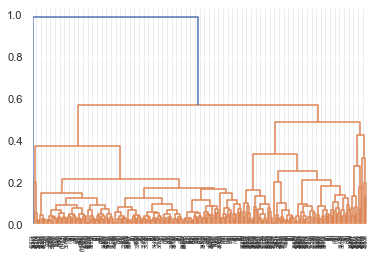

In [240]:
mergings = linkage(data_scaled, method="average", metric='euclidean')
dendrogram(mergings, p=10, truncate_mode="level")
plt.show()

In [272]:
cluster_labels_h = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels_h

array([0, 0, 0, ..., 0, 0, 0])

In [273]:
df_eda_numeric['Cluster_Labels_H'] = cluster_labels_h

In [274]:
df_eda_numeric['Cluster_Labels_H'].value_counts()

0    41512
1      201
2        1
Name: Cluster_Labels_H, dtype: int64